# Financial Planning


In [1]:
# Initial imports
import requests
import json
import pandas as pd
from dotenv import get_key
import alpaca_trade_api as tradeapi
%matplotlib inline
from MCForecastTools import MCSimulation

# Part 1 - Personal Finance Planner

In [4]:
# Set monthly household income
monthly_income = 12000
# YOUR CODE HERE!

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [8]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']["quotes"]['USD']['price']
# YOUR CODE HERE!

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']["quotes"]['USD']['price']
# YOUR CODE HERE!]

# Compute current value of my crpto
btc_qnty= 1.2
eth_qnty = 5.3
btc_value = btc_qnty * btc_price
eth_value = eth_qnty * eth_price

# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {btc_qnty} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_qnty} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $13780.40
The current value of your 5.3 ETH is $2036.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_key=get_key(".env", "ALPACA_API_KEY")
secret_key=get_key(".env", "ALPACA_SECRET_KEY")
# YOUR CODE HERE!

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key, secret_key, api_version="v2")
# YOUR CODE HERE!

In [41]:
# Format current date as ISO format
today=pd.Timestamp.now(tz="America/Chicago").isoformat()
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
                            
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers, timeframe, start= today, end=today).df
#df_portfolio.head()

agg_close_price = float(df_portfolio["AGG"]['close'])
spy_close_price = float(df_portfolio["SPY"]['close'])
# YOUR CODE HERE!

# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current {tickers[0]} closing price: ${agg_close_price}")
print(f"Current {tickers[1]} closing price: ${spy_close_price}")

Current AGG closing price: $118.69
Current SPY closing price: $339.44


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# YOUR CODE HERE!

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16861.00
The current value of your 200 AGG shares is $23674.00


### Savings Health Analysis

In [13]:
# Create savings DataFrame
# YOUR CODE HERE!
#capture the vaue of crypto investments and Shares investment into corresponding data frames, 
#aggregate total value of crypto currencies and shares in respective data frames
#index each data frame with corresponding investment  type
df_crypto = pd.DataFrame({"Value": [round(btc_value + eth_value, 2)]}, index = ["crypto"])
df_shares = pd.DataFrame({"Value": [round(my_spy_value + my_agg_value, 2)]}, index = ["shares"])

# Display savings DataFrame

#concatenate crypt and shares data frames into a single savings data frame, reset the index, 
#and rename the previously indexed coulmn as "Portfolio" and set the index to this column.
df_savings= pd.concat([df_crypto, df_shares], axis=0)
df_savings.reset_index(inplace = True)
df_savings.columns=["Portfolio", "Value"]
df_savings.set_index("Portfolio", inplace=True)
df_savings.head()

,Value
Portfolio,
crypto,15816.51
shares,40535.00


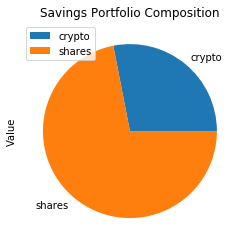

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="Value", title="Savings Portfolio Composition")
# YOUR CODE HERE!

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Value"].sum()
delta = int(total_savings - emergency_fund)
# YOUR CODE HERE!

#create a list with string message for each scenario. 
#calcuate delta (savings vs emergency fund) and pass it to fstring when displaying the message

message = [
    f"Congratulations!! you have enough money in your portfolio to cover for emergencies",
    f"Congratulations! You have reached a financial goal of saving enough to cover emergencies",
    f"You are short of {delta} dollars to reach you finacial goal of saving atleast 3 times the monthly expenses"
]
# Validate saving health
# based on the condition, just call the corresponding message from the list.
if total_savings > emergency_fund:
    print(message[0])
elif total_savings == emergency_fund:
    print(message[1])
else:
    print(message[2])

# YOUR CODE HERE!

Congratulations!! you have enough money in your portfolio to cover for emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/Chicago').isoformat()
end_date = pd.Timestamp.now(tz='America/Chicago').isoformat()
timeframe = "1D"

In [59]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = alpaca.get_barset(
    tickers, timeframe, start = start_date, end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

## create simulation input data

In [60]:
#include daily returns (percentage change) in the same data frame with daily close prices. 
#this was asked below to show the simulation input data.
df_stock_daily_returns = df_stock_data.xs('close',level=1,axis=1).pct_change()
columns = [(x, 'daily_return') for x in tickers]
df_stock_daily_returns.columns=pd.MultiIndex.from_tuples(columns)
df_stock_returns = df_stock_data.merge(df_stock_daily_returns,left_index=True,right_index=True).reindex(columns=tickers,level=0)
# Drop the time component of the date
df_stock_returns.index = df_stock_returns.index.date

In [61]:
# Printing the simulation input data
df_stock_returns.head()
# YOUR CODE HERE!

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

## Configure & Run Monte Carlo simulation

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use the simulation input data that has perentage change in daily close prices
#instantiate simulate cumilative returns with sim_cum_ret calling monte carlo simulation function 
#and passing the paratameters and key word arguemeents

sim_cum_ret = MCSimulation(df_stock_returns, weights=(0.4, 0.6), num_simulation=500, num_trading_days=252*30)
# YOUR CODE HERE!

In [63]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sim_cum_ret.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003961,0.997204,1.003965,1.001038,0.997689,0.999796,1.005807,0.996074,1.002566,1.005637,...,0.986576,1.012797,1.007274,1.006430,0.999938,1.000312,1.008184,1.006409,1.016615,0.987037
2,1.003064,0.996523,1.018374,1.000828,0.990222,0.999565,1.017851,0.981278,1.008915,1.004439,...,0.995444,1.013543,0.996651,1.009342,1.010202,1.001145,1.002695,1.007513,1.026203,0.989261
3,1.006176,1.001705,1.020546,0.991951,1.003205,0.997365,1.010602,0.985953,1.006585,1.005985,...,0.985853,1.015095,0.999003,0.999018,1.009856,1.003211,0.987174,1.005079,1.024268,0.982726
4,1.000660,0.987732,1.010992,0.990625,1.011065,1.006746,1.006779,0.993241,1.005610,1.010263,...,0.983777,1.006391,1.003969,0.992227,1.005186,0.990157,0.997290,1.004752,1.033189,0.985627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.749714,4.518210,17.202459,8.164653,16.398633,5.333749,10.053421,1.424724,8.019942,11.308055,...,3.123578,17.264891,15.744412,8.002217,10.651354,12.359757,7.122433,7.246933,21.586433,16.999844
7557,3.764487,4.560639,17.071391,8.198136,16.612319,5.377613,10.075576,1.434961,7.965198,11.291306,...,3.124043,17.361724,15.816202,7.963169,10.545933,12.424817,7.169594,7.169329,21.807703,17.019330
7558,3.749701,4.566731,17.101086,8.277390,16.569835,5.419430,10.099101,1.445926,7.939171,11.367342,...,3.109916,17.205604,15.871105,7.904021,10.606894,12.275190,7.165311,7.170528,21.731017,16.962593
7559,3.744242,4.536475,16.923135,8.262652,16.623083,5.418657,10.106679,1.437481,7.985162,11.392917,...,3.088928,17.254188,15.720581,7.976256,10.414589,12.220059,7.185124,7.143817,21.899952,17.120075


In [64]:
#Simulated cumulaative returns 
simulated_ret = sim_cum_ret.simulated_return
simulated_ret.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,3.749714,4.518210,17.202459,8.164653,16.398633,5.333749,10.053421,1.424724,8.019942,11.308055,...,3.123578,17.264891,15.744412,8.002217,10.651354,12.359757,7.122433,7.246933,21.586433,16.999844
7557,3.764487,4.560639,17.071391,8.198136,16.612319,5.377613,10.075576,1.434961,7.965198,11.291306,...,3.124043,17.361724,15.816202,7.963169,10.545933,12.424817,7.169594,7.169329,21.807703,17.019330
7558,3.749701,4.566731,17.101086,8.277390,16.569835,5.419430,10.099101,1.445926,7.939171,11.367342,...,3.109916,17.205604,15.871105,7.904021,10.606894,12.275190,7.165311,7.170528,21.731017,16.962593
7559,3.744242,4.536475,16.923135,8.262652,16.623083,5.418657,10.106679,1.437481,7.985162,11.392917,...,3.088928,17.254188,15.720581,7.976256,10.414589,12.220059,7.185124,7.143817,21.899952,17.120075
7560,3.755221,4.499166,16.917964,8.352150,16.904711,5.435428,10.107804,1.436616,8.027543,11.274276,...,3.083500,17.497749,15.552044,7.926283,10.413323,12.308752,7.118610,7.125517,22.043149,17.068967


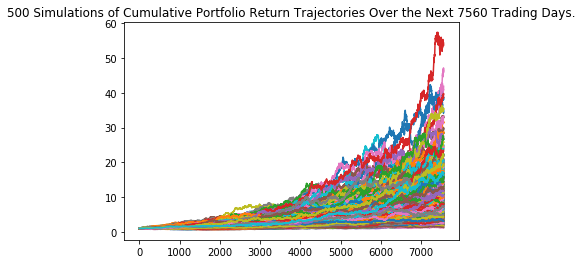

In [65]:
# Plot simulation outcomes
sim_cum_ret.plot_simulation()
# YOUR CODE HERE!

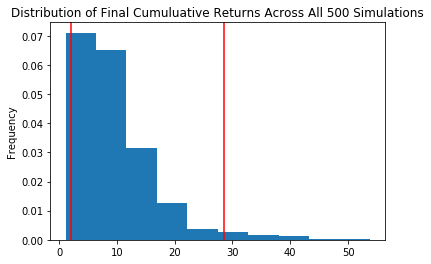

In [66]:
# Plot probability distribution and confidence intervals
sim_cum_ret.plot_distribution()
# YOUR CODE HERE!

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_cum_ret = sim_cum_ret.summarize_cumulative_return()
sum_cum_ret
# Print summary statistics

count           500.000000
mean              9.791334
std               6.996049
min               1.126225
25%               5.142178
50%               7.820016
75%              12.624741
max              53.767677
95% CI Lower      2.129457
95% CI Upper     28.519966
Name: 7560, dtype: float64

### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [68]:
# Set initial investment
init_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sum_cum_ret["95% CI Lower"]*init_investment, 2)
ci_upper = round(sum_cum_ret["95% CI Upper"]*init_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42589.15 and $570399.32


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [69]:
# Set initial investment
init_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(sum_cum_ret["95% CI Lower"]*init_investment, 2)
ci_upper = round(sum_cum_ret["95% CI Upper"]*init_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63883.72 and $855598.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sim_cum_ret_5yr = MCSimulation(df_stock_returns, weights=(0.4, 0.6), num_simulation=500, num_trading_days=252*5)
# YOUR CODE HERE!

In [71]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sim_cum_ret_5yr.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010417,0.994568,1.000635,1.005290,0.994176,1.010694,1.002972,1.004093,0.989730,0.995716,...,0.986769,1.001936,1.006382,1.002889,1.009497,1.013160,1.006901,1.013773,0.989242,0.996128
2,1.011246,0.989362,1.009340,1.010347,0.992936,1.014830,1.001297,1.009335,0.986693,0.998473,...,0.990799,1.010234,1.005439,0.992074,1.013432,1.023822,1.000869,1.014027,0.980761,0.997437
3,1.021920,0.993168,1.002176,1.009345,0.977116,0.997267,0.996106,1.005359,0.983757,0.994983,...,0.994556,1.013428,1.002274,0.993975,1.012085,1.017115,1.004560,1.012283,0.977317,1.005053
4,1.023833,0.998533,0.996033,1.009164,0.967329,0.993075,1.003663,1.009797,0.974835,0.990153,...,0.994345,1.022280,0.998869,0.994328,1.010539,1.029673,0.998738,1.013225,0.973000,1.013880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.433296,1.875385,1.271368,1.971761,1.542246,1.281727,1.741833,0.952881,0.797635,1.349255,...,1.344995,1.230853,1.049651,1.808236,1.621399,1.890250,1.347519,2.318361,1.735124,1.912408
1257,1.428577,1.847309,1.277213,1.974283,1.543988,1.285469,1.712793,0.949709,0.805757,1.334402,...,1.372158,1.227535,1.051340,1.798530,1.627457,1.889711,1.347347,2.321288,1.722165,1.875036
1258,1.413939,1.842132,1.271515,1.979931,1.522371,1.277520,1.727506,0.950443,0.803489,1.324240,...,1.372734,1.238156,1.061715,1.789233,1.633689,1.904911,1.343605,2.310544,1.699414,1.858302
1259,1.404837,1.843050,1.295741,1.971353,1.522834,1.290588,1.725340,0.957552,0.798379,1.335808,...,1.373966,1.241748,1.054890,1.769598,1.648390,1.898483,1.340759,2.314462,1.700039,1.858028


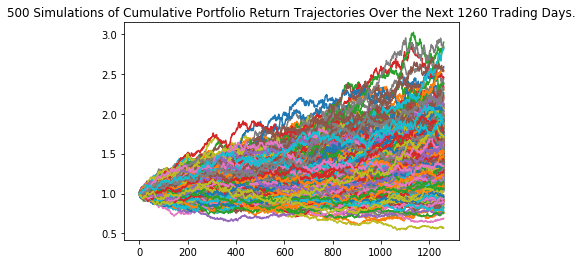

In [73]:
sim_ret_5yr = sim_cum_ret_5yr.simulated_return
# Plot simulation outcomes
sim_cum_ret_5yr.plot_simulation()
# YOUR CODE HERE!

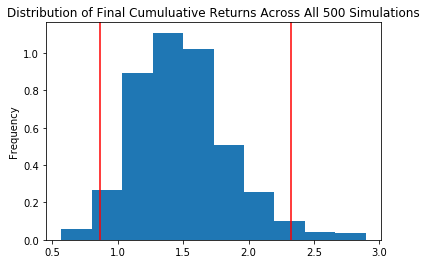

In [74]:
# Plot probability distribution and confidence intervals
sim_cum_ret_5yr.plot_distribution()
# YOUR CODE HERE!

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_cum_5yr = sim_cum_ret_5yr.summarize_cumulative_return()
# YOUR CODE HERE!
summary_cum_5yr 
# Print summary statistics


count           500.000000
mean              1.491224
std               0.372149
min               0.568983
25%               1.241137
50%               1.457044
75%               1.703955
max               2.895137
95% CI Lower      0.862872
95% CI Upper      2.327372
Name: 1260, dtype: float64

In [78]:
# Set initial investment
# YOUR CODE HERE!
init_investment_5yr = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower = round(summary_cum_5yr["95% CI Lower"]*init_investment_5yr, 2)
ci_upper = round(summary_cum_5yr["95% CI Upper"]*init_investment_5yr, 2)
# Print results
print(f"With an initial investment of ${init_investment_5yr} in the portfolio, \n " 
      f"over the next 5 years there is 95% chance that it will grow within in the range of"
      f" ${ci_lower} and ${ci_upper}")

With an initial investment of $60000 in the portfolio, 
 over the next 5 years there is 95% chance that it will grow within in the range of $51772.34 and $139642.29


### Ten Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sim_cum_ret_10yr = MCSimulation(df_stock_returns, weights=(0.4, 0.6), num_simulation=500, num_trading_days=252*10)
# YOUR CODE HERE!

In [80]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sim_cum_ret_10yr.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004325,1.005467,0.996304,0.986640,1.003080,1.005077,0.999613,1.002986,0.999891,0.998996,...,0.990876,0.988379,1.008028,1.008624,0.998347,0.991845,0.995523,0.991275,0.994259,1.009438
2,1.006430,1.011182,1.000624,0.982139,0.999444,1.009365,1.010134,1.005653,1.001345,1.005152,...,0.992012,0.988184,1.015313,1.017498,0.992628,0.986528,1.001108,0.988566,0.993469,0.997617
3,1.011449,1.008313,0.994903,0.975875,0.997457,1.007421,1.004283,1.014479,0.997728,1.020307,...,0.984785,0.996759,1.001249,1.013464,0.992052,0.978214,1.000042,0.990865,0.996612,1.002905
4,1.018854,1.013326,0.993746,0.973877,1.002666,1.008014,0.987494,1.020487,0.987334,1.021228,...,1.003730,0.986726,1.008871,1.013552,1.005528,0.960753,1.006074,0.991982,1.009566,1.004857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.664714,1.100676,2.023100,2.579142,2.485059,1.755091,2.037239,2.210781,2.624165,2.315496,...,2.834703,2.490742,2.556794,1.854905,1.627903,2.683329,3.080378,2.194907,4.005656,1.777924
2517,1.662434,1.093225,2.031187,2.610826,2.509062,1.765695,2.025448,2.211583,2.656346,2.336558,...,2.826004,2.480629,2.562184,1.875815,1.607090,2.713987,3.075527,2.210759,4.041094,1.781716
2518,1.677419,1.100122,2.062155,2.603556,2.507807,1.742964,2.032970,2.223480,2.633355,2.311928,...,2.845209,2.452860,2.572197,1.855309,1.605175,2.733846,3.076123,2.214868,4.057514,1.797529
2519,1.673172,1.103236,2.051703,2.587324,2.500153,1.755576,2.035262,2.221375,2.651746,2.296582,...,2.853658,2.441345,2.570124,1.870594,1.575298,2.730580,3.075148,2.184465,4.071504,1.784599


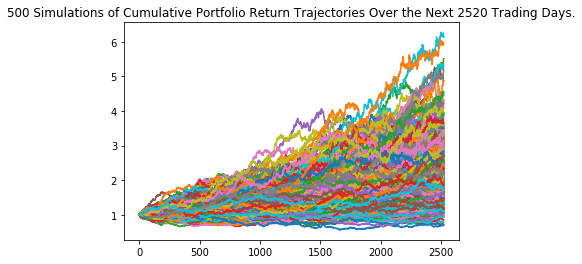

In [82]:
sim_ret_10yr = sim_cum_ret_10yr.simulated_return
# Plot simulation outcomes
sim_cum_ret_10yr.plot_simulation()
# YOUR CODE HERE!

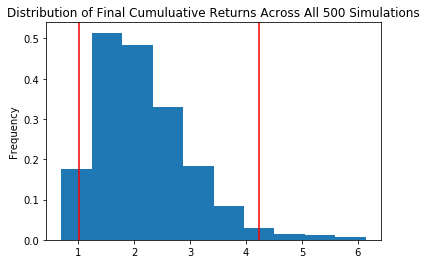

In [83]:
# Plot probability distribution and confidence intervals
sim_cum_ret_10yr.plot_distribution()
# YOUR CODE HERE!

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_cum_10yr = sim_cum_ret_10yr.summarize_cumulative_return()
# YOUR CODE HERE!
summary_cum_10yr 
# Print summary statistics


count           500.000000
mean              2.171542
std               0.849645
min               0.696419
25%               1.557762
50%               2.012171
75%               2.613136
max               6.141220
95% CI Lower      1.017015
95% CI Upper      4.223355
Name: 2520, dtype: float64

In [86]:
# Set initial investment
# YOUR CODE HERE!
init_investment_10yr = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower = round(summary_cum_10yr["95% CI Lower"]*init_investment_10yr, 2)
ci_upper = round(summary_cum_10yr["95% CI Upper"]*init_investment_10yr, 2)
# Print results
print(f"With an initial investment of ${init_investment_10yr} in the portfolio, \n " 
      f"over the next 10 years there is 95% chance that it will grow within in the range of"
      f" ${ci_lower} and ${ci_upper}")

With an initial investment of $60000 in the portfolio, 
 over the next 10 years there is 95% chance that it will grow within in the range of $61020.88 and $253401.28
